1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.datasets import make_classifications
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [34]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [35]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [36]:
type(iris)

sklearn.utils.Bunch

In [37]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names).iloc[:, :2]
iris_classes = iris.target

In [38]:
iris_data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [39]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_classes, test_size=0.25)

In [40]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [41]:
lda.predict(X_test)

array([2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 0,
       0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1])

In [42]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2
5,2,1
6,0,0
7,1,1
8,1,2
9,0,0


In [43]:
accuracy_score(y_test, lda.predict(X_test))

0.7631578947368421

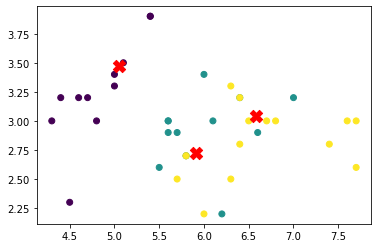

In [49]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='X')

plt.show()

## Кластеризация методом k-средних

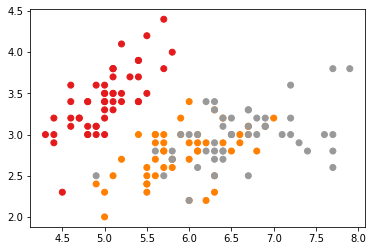

In [74]:
X = iris_data
y = iris_classes
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y, cmap='Set1')

In [75]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

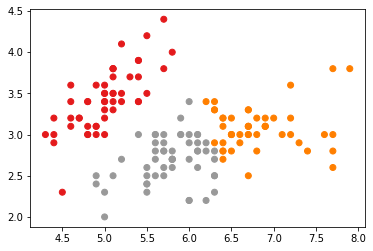

In [76]:
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], cmap='Set1', c=clusters)

In [78]:
k_inertia = []
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

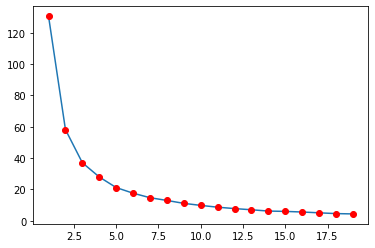

In [79]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')